In [1]:
import pvdeg
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import xarray as xr

In [ ]:
# geospatial scenario with downsample factor 120
tiny_res = xr.open_dataset("tiny-pysam-ground-irradiance.nc", engine="h5netcdf")

tiny_res

In [ ]:
tiny_res

In [ ]:
plt.plot(tiny_res.isel(latitude=0, longitude=2).ground_irradiance)

In [ ]:
pvdeg.geospatial.plot_sparse_analysis(tiny_res, "annual_poa", "nearest")

In [2]:
# geospatial scenarion with downsample factor 80
# this fails to capture a lot of information still, it is only 23 points
medium_res = xr.open_dataset("medium-pysam-ground-irradiance.nc", engine="h5netcdf")

medium_res

<xarray.Dataset> Size: 45MB
Dimensions:            (latitude: 4, longitude: 8, time: 17520, distance: 10)
Coordinates:
  * latitude           (latitude) float32 16B 28.13 34.53 40.93 47.33
  * longitude          (longitude) float32 32B -119.1 -112.7 ... -80.74 -74.34
  * time               (time) datetime64[ns] 140kB 2022-01-01 ... 2022-12-31T...
  * distance           (distance) int64 80B 0 1 2 3 4 5 6 7 8 9
Data variables:
    ground_irradiance  (time, distance, latitude, longitude) float64 45MB ...
    annual_poa         (latitude, longitude) float64 256B ...

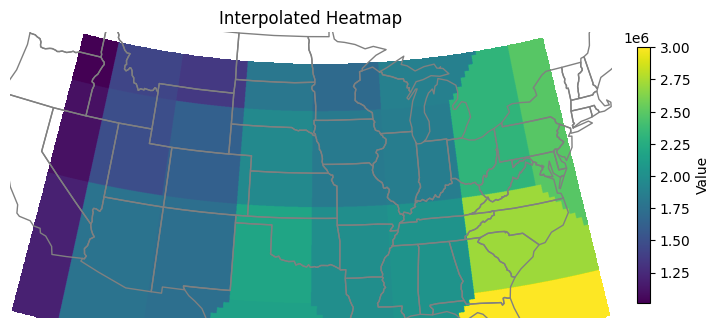

In [3]:
pvdeg.geospatial.plot_sparse_analysis(medium_res, "annual_poa", "nearest")

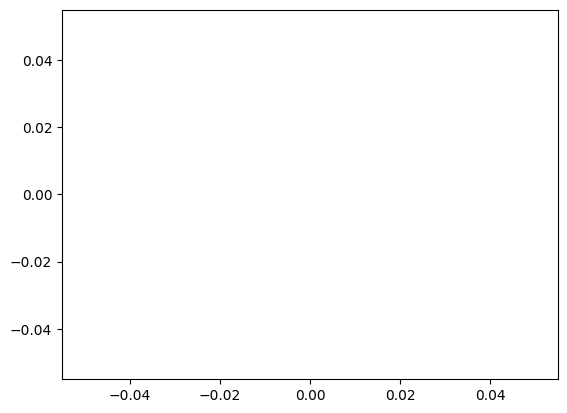

In [4]:
plt.plot(medium_res.isel(latitude=0, longitude=0)["ground_irradiance"])

In [5]:
nonzero_mask = (medium_res["ground_irradiance"] != 0).any(dim="distance")

filtered_data = medium_res["ground_irradiance"].where(nonzero_mask, drop=True)

monthly_avg_ground_irradiance = filtered_data.groupby(
    filtered_data.time.dt.month
).mean()

In [6]:
print(monthly_avg_ground_irradiance)

<xarray.DataArray 'ground_irradiance' (month: 12, distance: 10, latitude: 4,
                                       longitude: 8)> Size: 31kB
array([[[[         nan,          nan,          nan, ...,          nan,
          251.39039332,          nan],
         [ 58.11468011, 135.50811653, 130.04334361, ..., 133.85232808,
          181.60070609,          nan],
         [ 24.4110864 ,  33.46128267,  51.87048449, ...,  90.97590087,
          107.67174537, 131.8752547 ],
         [  8.26424536,  22.79696518,  19.23474817, ...,  24.92301527,
                   nan,          nan]],

        [[         nan,          nan,          nan, ...,          nan,
          103.76320269,          nan],
         [ 55.77057148, 115.69480471, 112.8438219 , ...,  99.32727088,
          120.38113996,          nan],
         [ 22.53734324,  31.22800764,  51.19419846, ...,  86.67066136,
           96.55777299, 120.14957928],
         [  7.38388653,  22.51238988,  18.32837128, ...,  21.68954543,
               

In [7]:
ground_irradiance_4th_index = monthly_avg_ground_irradiance.sel(distance=4)

In [8]:
print(ground_irradiance_4th_index)

<xarray.DataArray 'ground_irradiance' (month: 12, latitude: 4, longitude: 8)> Size: 3kB
array([[[         nan,          nan,          nan,  55.55454222,
                  nan,          nan,  54.30759401,          nan],
        [ 35.66458307,  40.59103488,  40.46357   ,  44.17483044,
          38.23314725,  45.83745845,  47.71876003,          nan],
        [ 39.04732841,  59.41248872,  51.33722895,  45.81060321,
          44.22284708,  47.42881641,  63.82298453,  56.19135839],
        [ 18.42538431,  31.28036718,  32.88908583,  47.30613005,
          47.39860878,  39.10015323,          nan,          nan]],

       [[         nan,          nan,          nan, 104.8980246 ,
                  nan,          nan, 155.29302898,          nan],
        [ 36.79962246,  41.09304574,  45.26533339,  66.73025286,
          49.57519075,  53.01782325,  67.4399442 ,          nan],
        [ 53.60133553,  60.33875813,  55.05855703,  48.44754639,
          58.31600858,  59.08787611,  67.57435107,  54.7163

In [ ]:
ground_irradiance = ground_irradiance_4th_index

mean_irradiance = ground_irradiance.mean(dim="month")

# Create the map
fig, ax = plt.subplots(subplot_kw={"projection": ccrs.PlateCarree()}, figsize=(12, 8))

# Plot data
mesh = ax.pcolormesh(
    mean_irradiance.longitude,
    mean_irradiance.latitude,
    mean_irradiance,
    transform=ccrs.PlateCarree(),
    cmap="viridis",
    shading="auto",
)

# Add map features
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=":")
ax.add_feature(cfeature.LAND, edgecolor="black")
ax.add_feature(cfeature.LAKES, edgecolor="blue")
ax.add_feature(cfeature.RIVERS)

# Add colorbar
cbar = plt.colorbar(mesh, orientation="horizontal", pad=0.05, aspect=50)
cbar.set_label("Mean Ground Irradiance")

# Add title
plt.title("Mean Ground Irradiance Across Locations", fontsize=16)

# Show the plot
plt.show()

In [2]:
# unform downsample (40) with 81 points.

# unform downsample (20) with ~350 points
project_dir = "/projects/inspire/PySAM-MAPS"
file = "downsample20-conf01-pysam-ground-irradiance.nc"

medium_res = xr.open_dataset(f"{project_dir}/{file}", engine="h5netcdf")

In [3]:
monthly_avgs = pvdeg.pysam.ground_irradiance_monthly(medium_res)

In [17]:
monthly_avgs.latitude[-1].item()

48.93000030517578

In [23]:
scale_factor = 4

new_lat = np.linspace(
    monthly_avgs.latitude[0].item(),
    monthly_avgs.latitude[-1].item(),
    monthly_avgs.sizes["latitude"] * scale_factor,
)
new_lon = np.linspace(
    monthly_avgs.longitude[0].item(),
    monthly_avgs.longitude[-1].item(),
    monthly_avgs.sizes["longitude"] * scale_factor,
)

dsi = monthly_avgs.interp(latitude=new_lat, longitude=new_lon)

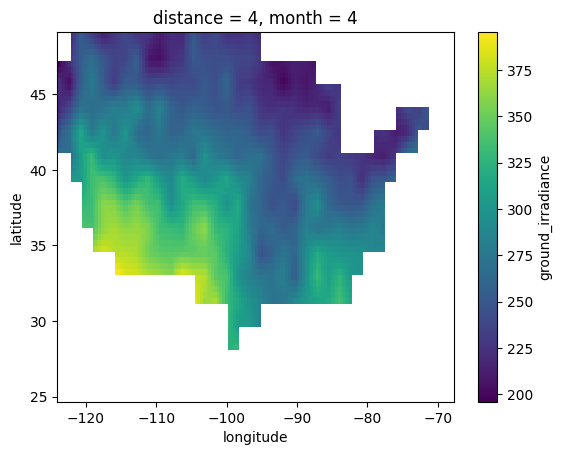

In [27]:
dsi.sel(distance=4).sel(month=4).plot()

NameError: name 'mesh' is not defined

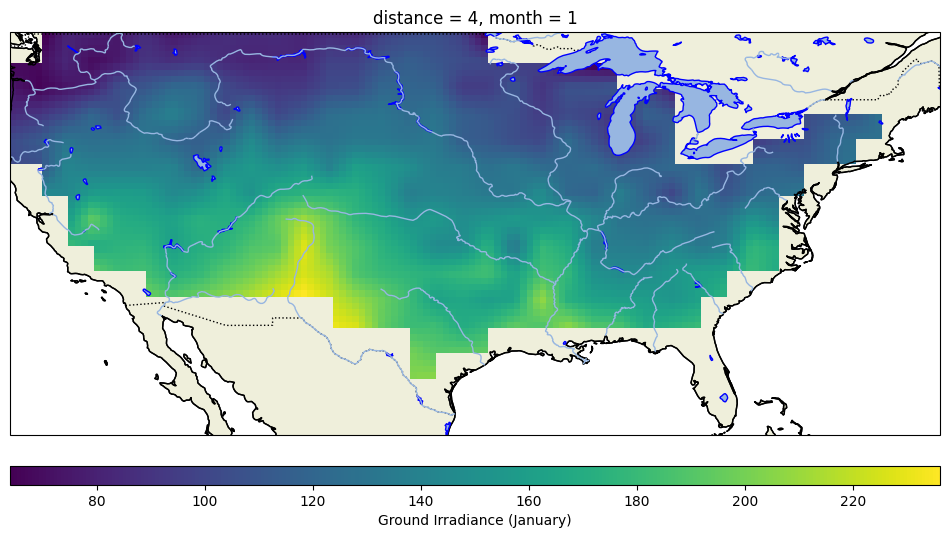

In [28]:
# ground_irradiance = monthly_avgs.sel(distance=4)
ground_irradiance = dsi.sel(distance=4)

for i in range(1, 13):
    fig, ax = plt.subplots(
        figsize=(12, 8), subplot_kw={"projection": ccrs.PlateCarree()}
    )

    ground_irradiance.sel(month=i).plot(
        ax=ax,
        transform=ccrs.PlateCarree(),  # Ensure data is plotted in the correct coordinate system
        cmap="viridis",
        cbar_kwargs={
            "orientation": "horizontal",
            "pad": 0.05,
            "aspect": 50,
            "label": "Ground Irradiance (January)",
        },
    )

    # Add map features
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linestyle=":")
    ax.add_feature(cfeature.LAND, edgecolor="black")
    ax.add_feature(cfeature.LAKES, edgecolor="blue")
    ax.add_feature(cfeature.RIVERS)

    # Add colorbar
    cbar = plt.colorbar(mesh, orientation="horizontal", pad=0.05, aspect=50)
    cbar.set_label("Mean Ground Irradiance")

    # Add title
    plt.title("Mean Ground Irradiance Across Locations", fontsize=16)

    # Show the plot
    plt.show()

/home/tford/.conda-envs/rpp/lib/python3.10/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


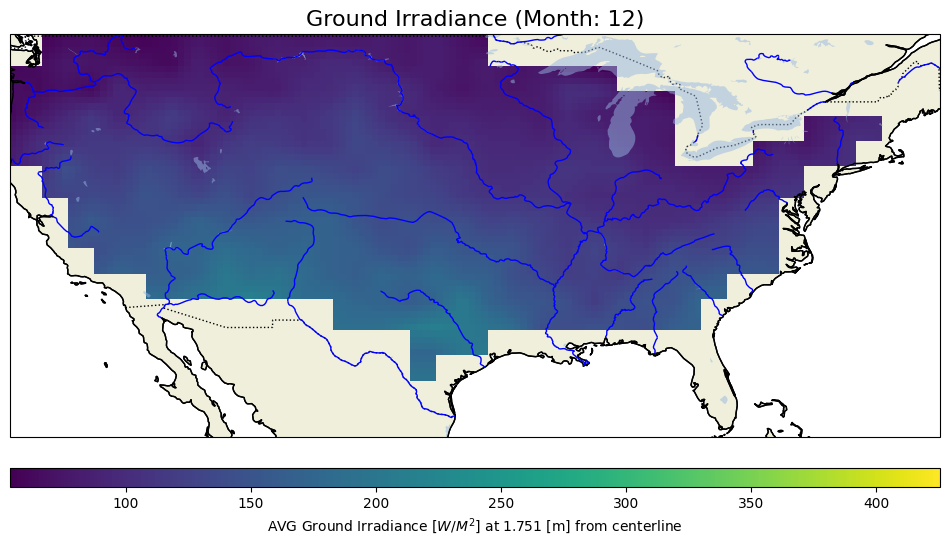

In [29]:
# ground_irradiance = monthly_avgs.sel(distance=4)
ground_irradiance = dsi.sel(distance=4)

# distances for this sim
distances_conf1 = (
    0.2502810919746036,
    0.7508432759238107,
    1.251405459873018,
    1.751967643822225,
    2.2525298277714323,
    2.753092011720639,
    3.2536541956698466,
    3.7542163796190535,
    4.2547785635682605,
    4.755340747517468,
)

# Compute the global min and max values across all months for consistent scaling
vmin = ground_irradiance.min().item()
vmax = ground_irradiance.max().item()

# Set up the figure and axis with Cartopy projection
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={"projection": ccrs.PlateCarree()})

# Add map features
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=":")
ax.add_feature(cfeature.LAND, edgecolor="black")
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS, color="blue")

# Set up the title
title = ax.set_title("", fontsize=16)

# Add an initial dummy plot to create a colorbar
dummy_mesh = ax.pcolormesh(
    ground_irradiance.longitude,
    ground_irradiance.latitude,
    ground_irradiance.isel(month=0),
    transform=ccrs.PlateCarree(),
    cmap="viridis",
    vmin=vmin,
    vmax=vmax,
)

# Add a colorbar
cbar = plt.colorbar(dummy_mesh, ax=ax, orientation="horizontal", pad=0.05, aspect=50)
cbar.set_label("AVG Ground Irradiance [$W/M^2$] at 1.751 [m] from centerline")

# Remove the dummy mesh
dummy_mesh.remove()

# Initialize the first plot
mesh = None


# Function to update the plot for each frame (month)
def update(month):
    global mesh
    if mesh:
        mesh.remove()  # Remove the previous mesh
    # Select the data for the current month
    month_data = ground_irradiance.sel(month=month)
    # Plot the data
    mesh = ax.pcolormesh(
        month_data.longitude,
        month_data.latitude,
        month_data,
        transform=ccrs.PlateCarree(),
        cmap="viridis",
        shading="auto",
        vmin=vmin,  # Fixed minimum value for the color scale
        vmax=vmax,  # Fixed maximum value for the color scale
    )
    # Update the title
    title.set_text(f"Ground Irradiance (Month: {month})")
    return mesh, title


# Create the animation
anim = FuncAnimation(fig, update, frames=range(1, 13), interval=1000, blit=False)

# Save the animation as a GIF
anim.save("ground_irradiance_with_colorbar.gif", writer="pillow", fps=1)

# Display the animation (optional)
plt.show()